# Covid-19

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df = pd.read_csv('owid-covid-data-25Jun.csv')
df.shape


(97792, 60)

In [5]:
df.head(10)

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
5      AFG      Asia  Afghanistan  2020-02-29          1.0        0.0   
6      AFG      Asia  Afghanistan  2020-03-01          1.0        0.0   
7      AFG      Asia  Afghanistan  2020-03-02          1.0        0.0   
8      AFG      Asia  Afghanistan  2020-03-03          2.0        1.0   
9      AFG      Asia  Afghanistan  2020-03-04          4.0        2.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   
5               0.143           NaN         NaN                  0.0   
6               0.143           NaN         NaN                  0.0   
7               0.000           NaN         NaN                  0.0   
8               0.143           NaN         NaN                  0.0   
9               0.429           NaN         NaN                  0.0   

   total_cases_per_million  new_cases_per_million  \
0                    0.026                  0.026   
1                    0.026                  0.000   
2                    0.026                  0.000   
3                    0.026                  0.000   
4                    0.026                  0.000   
5                    0.026                  0.000   
6                    0.026                  0.000   
7                    0.026                  0.000   
8                    0.051                  0.026   
9                    0.103                  0.051   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   
5                           0.004                       NaN   
6                           0.004                       NaN   
7                           0.000                       NaN   
8                           0.004                       NaN   
9                           0.011                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   
5                     NaN                              0.0                NaN   
6                     NaN                              0.0                NaN   
7                     NaN                              0.0                NaN   
8                     NaN                              0.0                NaN   
9                     NaN                              0.0                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            Na

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97792 entries, 0 to 97791
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               97792 non-null  object 
 1   continent                              93195 non-null  object 
 2   location                               97792 non-null  object 
 3   date                                   97792 non-null  object 
 4   total_cases                            94373 non-null  float64
 5   new_cases                              94370 non-null  float64
 6   new_cases_smoothed                     93360 non-null  float64
 7   total_deaths                           84297 non-null  float64
 8   new_deaths                             84453 non-null  float64
 9   new_deaths_smoothed                    93360 non-null  float64
 10  total_cases_per_million                93870 non-null  float64
 11  ne

In [8]:
df.isnull().sum()

iso_code                                     0
continent                                 4597
location                                     0
date                                         0
total_cases                               3419
new_cases                                 3422
new_cases_smoothed                        4432
total_deaths                             13495
new_deaths                               13339
new_deaths_smoothed                       4432
total_cases_per_million                   3922
new_cases_per_million                     3925
new_cases_smoothed_per_million            4930
total_deaths_per_million                 13985
new_deaths_per_million                   13829
new_deaths_smoothed_per_million           4930
reproduction_rate                        18905
icu_patients                             87871
icu_patients_per_million                 87871
hosp_patients                            85462
hosp_patients_per_million                85462
weekly_icu_ad

In [9]:
#missingno.matrix(df,figsize=(90,60))

df1 = df[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'reproduction_rate', 'icu_patients', 
        'hosp_patients', 'new_tests', 'total_tests',
       'new_tests_smoothed',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred','stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
        'gdp_per_capita', 'extreme_poverty',
       'life_expectancy', 'human_development_index']]
df1.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   reproduction_rate  icu_patients  hosp_patients  new_tests  total_tests  \
0                NaN           NaN            NaN        NaN          NaN   
1                NaN           NaN            NaN        NaN          NaN   
2                NaN           NaN            NaN        NaN          NaN   
3                NaN           NaN            NaN        NaN          NaN   
4                NaN           NaN            NaN        NaN          NaN   

   new_tests_smoothed  positive_rate  tests_per_case  total_vaccinations  \
0                 NaN            NaN             NaN                 NaN   
1                 NaN            NaN             NaN                 NaN   
2                 NaN            NaN             NaN                 NaN   
3                 NaN            NaN             NaN                 NaN   
4                 NaN            NaN             NaN                 NaN   

   people_vaccinated  people_fully_vaccinated  new_vaccinations  \
0                NaN                      NaN               NaN   
1                NaN                      NaN               NaN   
2                NaN                      NaN               NaN   
3                NaN                      NaN               NaN   
4                NaN                      NaN               NaN   

   new_vaccinations_smoothed  total_vaccinations_per_hundred  \
0                        NaN                             NaN   
1                        NaN                             NaN   
2                        NaN                             NaN   
3                        NaN                             NaN   
4                        NaN                             NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                            NaN                                  NaN   
1                            NaN                                  NaN   
2                            NaN                                  NaN   
3                            NaN                                  NaN   
4                            NaN                                  NaN   

   stringency_index  population  population_density  median_age  \
0              8.33  38928341.0              54.422        18.6   
1              8.33  38928341.0              54.422        18.6   
2              8.33  38928341.0              54.422        18.6   
3              8.33  38928341.0              54.422        18.6   
4              8.33  38928341.0              54.422        18.6   

   aged_65_older  gdp_per_capita  extreme_poverty  life_expectancy  \
0          2.581        1803.987              NaN            64.83   
1          2.581        1803.987              NaN            64.83   
2          2.581        1803.987              NaN            64.83   
3          2.581        1803.987              NaN            64.83   
4          2.581        1803.987              NaN            64.83   

   human_development_index  
0                    0.511  
1                    0.511  
2                    0.511  
3                    0.511  
4             

In [10]:
df1.shape

(97792, 35)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97792 entries, 0 to 97791
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             97792 non-null  object 
 1   continent                            93195 non-null  object 
 2   location                             97792 non-null  object 
 3   date                                 97792 non-null  object 
 4   total_cases                          94373 non-null  float64
 5   new_cases                            94370 non-null  float64
 6   new_cases_smoothed                   93360 non-null  float64
 7   total_deaths                         84297 non-null  float64
 8   new_deaths                           84453 non-null  float64
 9   new_deaths_smoothed                  93360 non-null  float64
 10  reproduction_rate                    78887 non-null  float64
 11  icu_patients                

In [12]:
df1.isnull().sum()

iso_code                                   0
continent                               4597
location                                   0
date                                       0
total_cases                             3419
new_cases                               3422
new_cases_smoothed                      4432
total_deaths                           13495
new_deaths                             13339
new_deaths_smoothed                     4432
reproduction_rate                      18905
icu_patients                           87871
hosp_patients                          85462
new_tests                              53955
total_tests                            54260
new_tests_smoothed                     46850
positive_rate                          50268
tests_per_case                         50866
total_vaccinations                     82174
people_vaccinated                      82957
people_fully_vaccinated                85792
new_vaccinations                       84768
new_vaccin

In [13]:
df1['continent'].isnull().sum()

4597

In [14]:
df1[df1['continent'].isnull()]

iso_code continent location        date  total_cases  new_cases  \
486    OWID_AFR       NaN   Africa  2020-02-13          NaN        0.0   
487    OWID_AFR       NaN   Africa  2020-02-14          1.0        1.0   
488    OWID_AFR       NaN   Africa  2020-02-15          1.0        0.0   
489    OWID_AFR       NaN   Africa  2020-02-16          1.0        0.0   
490    OWID_AFR       NaN   Africa  2020-02-17          1.0        0.0   
...         ...       ...      ...         ...          ...        ...   
96423  OWID_WRL       NaN    World  2021-06-19  178188439.0   347446.0   
96424  OWID_WRL       NaN    World  2021-06-20  178488763.0   300324.0   
96425  OWID_WRL       NaN    World  2021-06-21  178786158.0   297395.0   
96426  OWID_WRL       NaN    World  2021-06-22  179158295.0   372137.0   
96427  OWID_WRL       NaN    World  2021-06-23  179595550.0   437255.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
486                   NaN           NaN         0.0                  NaN   
487                   NaN           NaN         0.0                  NaN   
488                   NaN           NaN         0.0                  NaN   
489                   NaN           NaN         0.0                  NaN   
490                   NaN           NaN         0.0                  NaN   
...                   ...           ...         ...                  ...   
96423          361052.857     3859623.0      8070.0             9208.571   
96424          360682.571     3866179.0      6556.0             8838.429   
96425          359093.429     3873255.0      7076.0             8723.429   
96426          359184.429     3882237.0      8982.0             8498.857   
96427          364715.286     3891760.0      9523.0             8382.714   

       reproduction_rate  icu_patients  hosp_patients  new_tests  total_tests  \
486                  NaN           NaN            NaN        NaN          NaN   
487                  NaN           NaN            NaN        NaN          NaN   
488                  NaN           NaN            NaN        NaN          NaN   
489                  NaN           NaN            NaN        NaN          NaN   
490                  NaN           NaN            NaN        NaN          NaN   
...                  ...           ...            ...        ...          ...   
96423               0.93           NaN            NaN        NaN          NaN   
96424               0.94           NaN            NaN        NaN          NaN   
96425               0.94           NaN            NaN        NaN          NaN   
96426               0.94           NaN            NaN        NaN          NaN   
96427                NaN           NaN            NaN        NaN          NaN   

       new_tests_smoothed  positive_rate  tests_per_case  total_vaccinations  \
486                   NaN            NaN             NaN                 NaN   
487                   NaN            NaN             NaN                 NaN   
488                   NaN            NaN             NaN                 NaN   
489                   NaN            NaN             NaN                 NaN   
490                   NaN            NaN             NaN                 NaN   
...                   ...            ...             ...                 ...   
96423                 NaN            NaN             NaN        2.626590e+09   
96424                 NaN            NaN             NaN        2.665116e+09   
96425                 NaN            NaN             NaN        2.707867e+09   
96426                 NaN            NaN             NaN        2.751470e+09   
96427                 NaN            NaN             NaN        2.789870e+09   

       people_vaccinated  people_fully_vaccinated  new_vaccinations  \
486                  NaN                      NaN               NaN   
487                  NaN                      NaN               NaN   
488                  NaN                      NaN         

In [15]:
print(df1['location'].nunique())
df1['location'].unique()

230


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [16]:
df1['continent'].value_counts()

Africa           25197
Asia             23187
Europe           23181
North America    12074
South America     5883
Oceania           3673
Name: continent, dtype: int64

In [17]:
df1['continent'].isnull().sum()

4597

In [18]:
df1['location'][df1['continent'].isnull()].unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'International',
       'North America', 'Oceania', 'South America', 'World'], dtype=object)

In [19]:
df1['location'][df1['continent'].isnull()].value_counts()

Asia              519
World             519
North America     519
European Union    518
Europe            518
Oceania           516
International     503
Africa            497
South America     488
Name: location, dtype: int64

<AxesSubplot:>

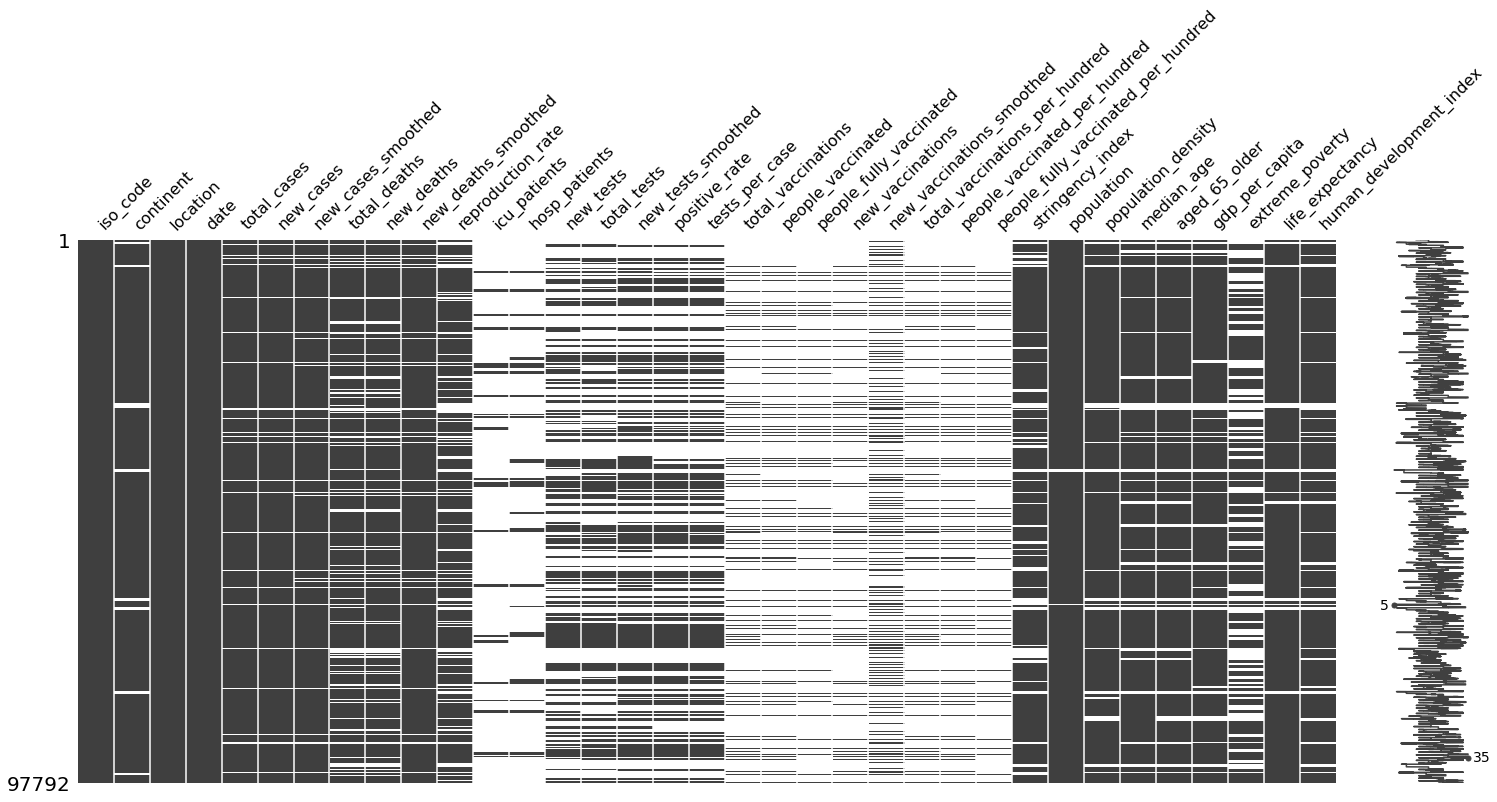

In [20]:
missingno.matrix(df1)

In [21]:
df1.loc[df1['location'].isin(['Africa','Asia'])]

iso_code continent location        date  total_cases  new_cases  \
486   OWID_AFR       NaN   Africa  2020-02-13          NaN        0.0   
487   OWID_AFR       NaN   Africa  2020-02-14          1.0        1.0   
488   OWID_AFR       NaN   Africa  2020-02-15          1.0        0.0   
489   OWID_AFR       NaN   Africa  2020-02-16          1.0        0.0   
490   OWID_AFR       NaN   Africa  2020-02-17          1.0        0.0   
...        ...       ...      ...         ...          ...        ...   
5117  OWID_ASI       NaN     Asia  2021-06-19   54332668.0   123451.0   
5118  OWID_ASI       NaN     Asia  2021-06-20   54462056.0   129388.0   
5119  OWID_ASI       NaN     Asia  2021-06-21   54586521.0   124465.0   
5120  OWID_ASI       NaN     Asia  2021-06-22   54717699.0   131178.0   
5121  OWID_ASI       NaN     Asia  2021-06-23   54856975.0   139276.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
486                  NaN           NaN         0.0                  NaN   
487                  NaN           NaN         0.0                  NaN   
488                  NaN           NaN         0.0                  NaN   
489                  NaN           NaN         0.0                  NaN   
490                  NaN           NaN         0.0                  NaN   
...                  ...           ...         ...                  ...   
5117          135681.571      763319.0      2589.0             3492.857   
5118          134225.571      765953.0      2634.0             3147.714   
5119          133285.571      768538.0      2585.0             2955.143   
5120          132643.429      771120.0      2582.0             2797.429   
5121          132529.571      773779.0      2659.0             2682.714   

      reproduction_rate  icu_patients  hosp_patients  new_tests  total_tests  \
486                 NaN           NaN            NaN        NaN          NaN   
487                 NaN           NaN            NaN        NaN          NaN   
488                 NaN           NaN            NaN        NaN          NaN   
489                 NaN           NaN            NaN        NaN          NaN   
490                 NaN           NaN            NaN        NaN          NaN   
...                 ...           ...            ...        ...          ...   
5117                NaN           NaN            NaN        NaN          NaN   
5118                NaN           NaN            NaN        NaN          NaN   
5119                NaN           NaN            NaN        NaN          NaN   
5120                NaN           NaN            NaN        NaN          NaN   
5121                NaN           NaN            NaN        NaN          NaN   

      new_tests_smoothed  positive_rate  tests_per_case  total_vaccinations  \
486                  NaN            NaN             NaN                 NaN   
487                  NaN            NaN             NaN                 NaN   
488                  NaN            NaN             NaN                 NaN   
489                  NaN            NaN             NaN                 NaN   
490                  NaN            NaN             NaN                 NaN   
...                  ...            ...             ...                 ...   
5117                 NaN            NaN             NaN        1.551525e+09   
5118                 NaN            NaN             NaN        1.582400e+09   
5119                 NaN            NaN             NaN        1.616993e+09   
5120                 NaN            NaN             NaN        1.650189e+09   
5121                 NaN            NaN             NaN        1.681922e+09   

      people_vaccinated  people_fully_vaccinated  new_vaccinations  \
486                 NaN                      NaN               NaN   
487                 NaN                      NaN               NaN   
488                 NaN                      NaN               NaN   
489                 NaN               

In [22]:
location_index = df1[df1['location'].isin(['Africa','Asia', 'Europe', 'European Union', 'International',
       'North America', 'Oceania', 'South America', 'World'])].index
location_index

Int64Index([  486,   487,   488,   489,   490,   491,   492,   493,   494,
              495,
            ...
            96418, 96419, 96420, 96421, 96422, 96423, 96424, 96425, 96426,
            96427],
           dtype='int64', length=4597)

In [23]:
df1.drop(location_index, inplace = True)

D:\Users\emman\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
df1.shape

(93195, 35)

<AxesSubplot:>

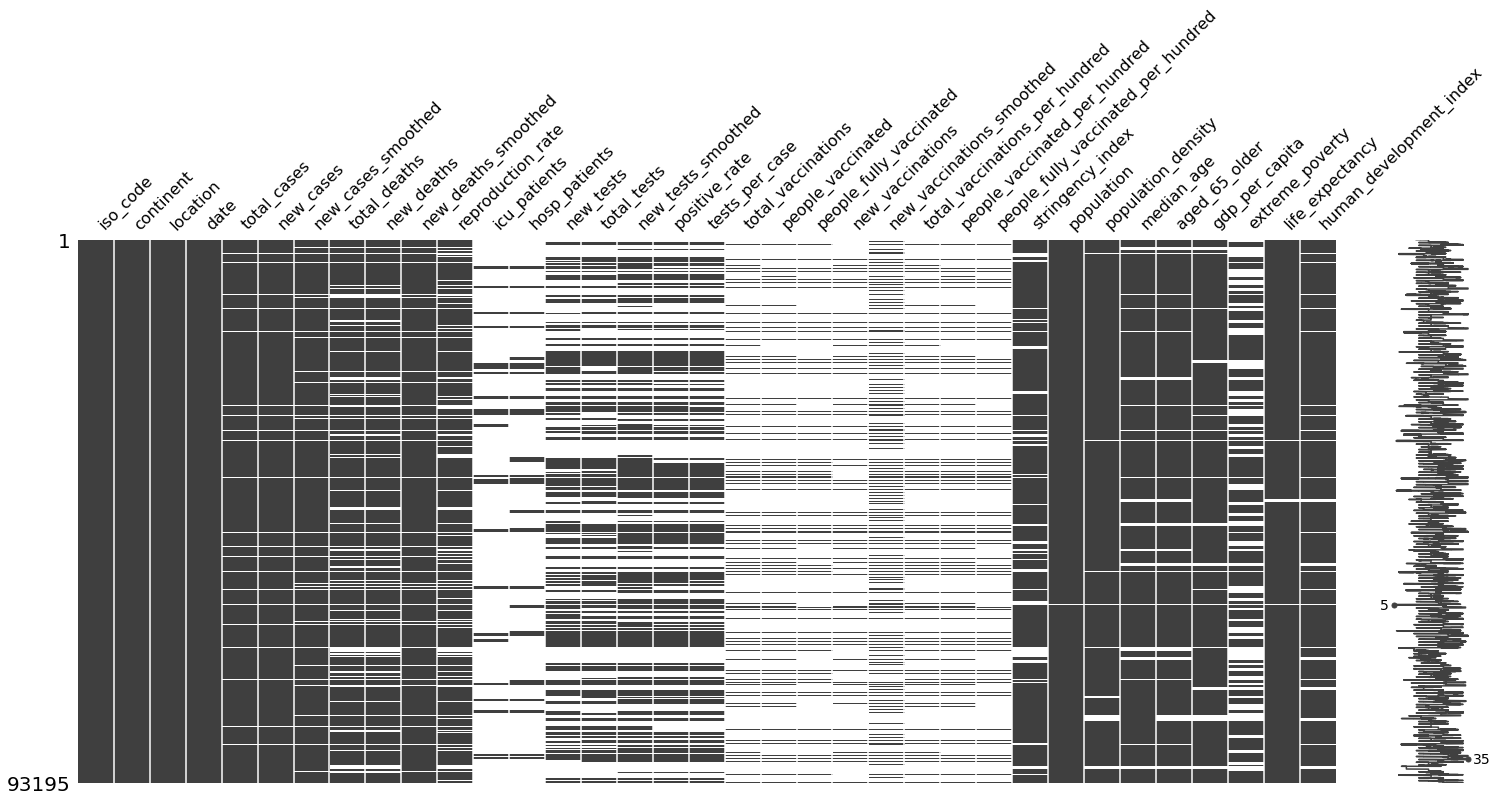

In [25]:
missingno.matrix(df1)

In [26]:
df1['continent'].isnull().sum()

0

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93195 entries, 0 to 97791
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             93195 non-null  object 
 1   continent                            93195 non-null  object 
 2   location                             93195 non-null  object 
 3   date                                 93195 non-null  object 
 4   total_cases                          89781 non-null  float64
 5   new_cases                            89773 non-null  float64
 6   new_cases_smoothed                   88816 non-null  float64
 7   total_deaths                         79870 non-null  float64
 8   new_deaths                           79869 non-null  float64
 9   new_deaths_smoothed                  88816 non-null  float64
 10  reproduction_rate                    78370 non-null  float64
 11  icu_patients                

In [28]:
df1.to_csv('covid_data.csv', index=False)

In [29]:
df2 = pd.read_csv('covid_data.csv')
df2

iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1          AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2          AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3          AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4          AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
...        ...       ...          ...         ...          ...        ...   
93190      ZWE    Africa     Zimbabwe  2021-06-19      41628.0      293.0   
93191      ZWE    Africa     Zimbabwe  2021-06-20      41779.0      151.0   
93192      ZWE    Africa     Zimbabwe  2021-06-21      42195.0      416.0   
93193      ZWE    Africa     Zimbabwe  2021-06-22      42714.0      519.0   
93194      ZWE    Africa     Zimbabwe  2021-06-23      43480.0      766.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                     NaN           NaN         NaN                  NaN   
1                     NaN           NaN         NaN                  NaN   
2                     NaN           NaN         NaN                  NaN   
3                     NaN           NaN         NaN                  NaN   
4                     NaN           NaN         NaN                  NaN   
...                   ...           ...         ...                  ...   
93190             253.714        1666.0        10.0                4.857   
93191             260.000        1672.0         6.0                5.714   
93192             302.571        1685.0        13.0                7.143   
93193             342.286        1691.0         6.0                7.714   
93194             417.714        1692.0         1.0                7.429   

       reproduction_rate  icu_patients  hosp_patients  new_tests  total_tests  \
0                    NaN           NaN            NaN        NaN          NaN   
1                    NaN           NaN            NaN        NaN          NaN   
2                    NaN           NaN            NaN        NaN          NaN   
3                    NaN           NaN            NaN        NaN          NaN   
4                    NaN           NaN            NaN        NaN          NaN   
...                  ...           ...            ...        ...          ...   
93190               1.87           NaN            NaN        NaN          NaN   
93191               1.88           NaN            NaN        NaN          NaN   
93192               1.89           NaN            NaN        NaN          NaN   
93193               1.89           NaN            NaN        NaN          NaN   
93194                NaN           NaN            NaN        NaN          NaN   

       new_tests_smoothed  positive_rate  tests_per_case  total_vaccinations  \
0                     NaN            NaN             NaN                 NaN   
1                     NaN            NaN             NaN                 NaN   
2                     NaN            NaN             NaN                 NaN   
3                     NaN            NaN             NaN                 NaN   
4                     NaN            NaN             NaN                 NaN   
...                   ...            ...             ...                 ...   
93190                 NaN            NaN             NaN           1133920.0   
93191                 NaN            NaN             NaN           1138733.0   
93192                 NaN            NaN             NaN           1140852.0   
93193                 NaN            NaN             NaN           1146378.0   
93194                 NaN            NaN             NaN           1166849.0   

       people_vaccinated  people_fully_vaccinated  new_vaccinations  \
0                    NaN                      NaN               NaN   
1                    NaN                      NaN               NaN   
2                    